# **CUSTOMER CHURN PREDICTION**

## Problem Statement: 
Build a Model to predict which customers are likely to churn

# TASK:
Perform exploratory Data analysis and predictive modelling


# Churn Value: 
1 = the customer left the company this quarter.
0 = the customer remained with the company.

# 1.Importing the libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

# 2.Load the Data

In [2]:
df=pd.read_excel('D:\\Project\\dataset\\archive\\Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
churn_count=df['Churn Value'].value_counts()
churn_count

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [6]:
print("\n--- 2.1 Dataset Shape, Types, and Churn Rate ---")
print(f"Dataset Shape: {df.shape}")
print("\nData Types:")
print(df.info())



--- 2.1 Dataset Shape, Types, and Churn Rate ---
Dataset Shape: (7043, 33)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-nul

In [7]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

# 3.Data Cleaning 

In [8]:
drop_columns=df.drop(['CustomerID','Count','Country','State','City',
                      'Zip Code','Lat Long','Latitude','Longitude',
                      'Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)

In [9]:
#Convert Total Charges to numeric
df['Total Charges']=pd.to_numeric(df['Total Charges'],errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(),inplace=True)

C:\Users\home\AppData\Local\Temp\ipykernel_7428\2522432424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(),inplace=True)


# 4.EDA

### Target Distribution

C:\Users\home\AppData\Local\Temp\ipykernel_7428\2754274456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Value',data=df,palette=['Green','red'])


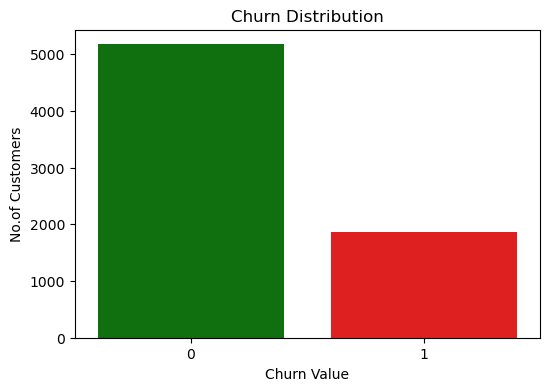

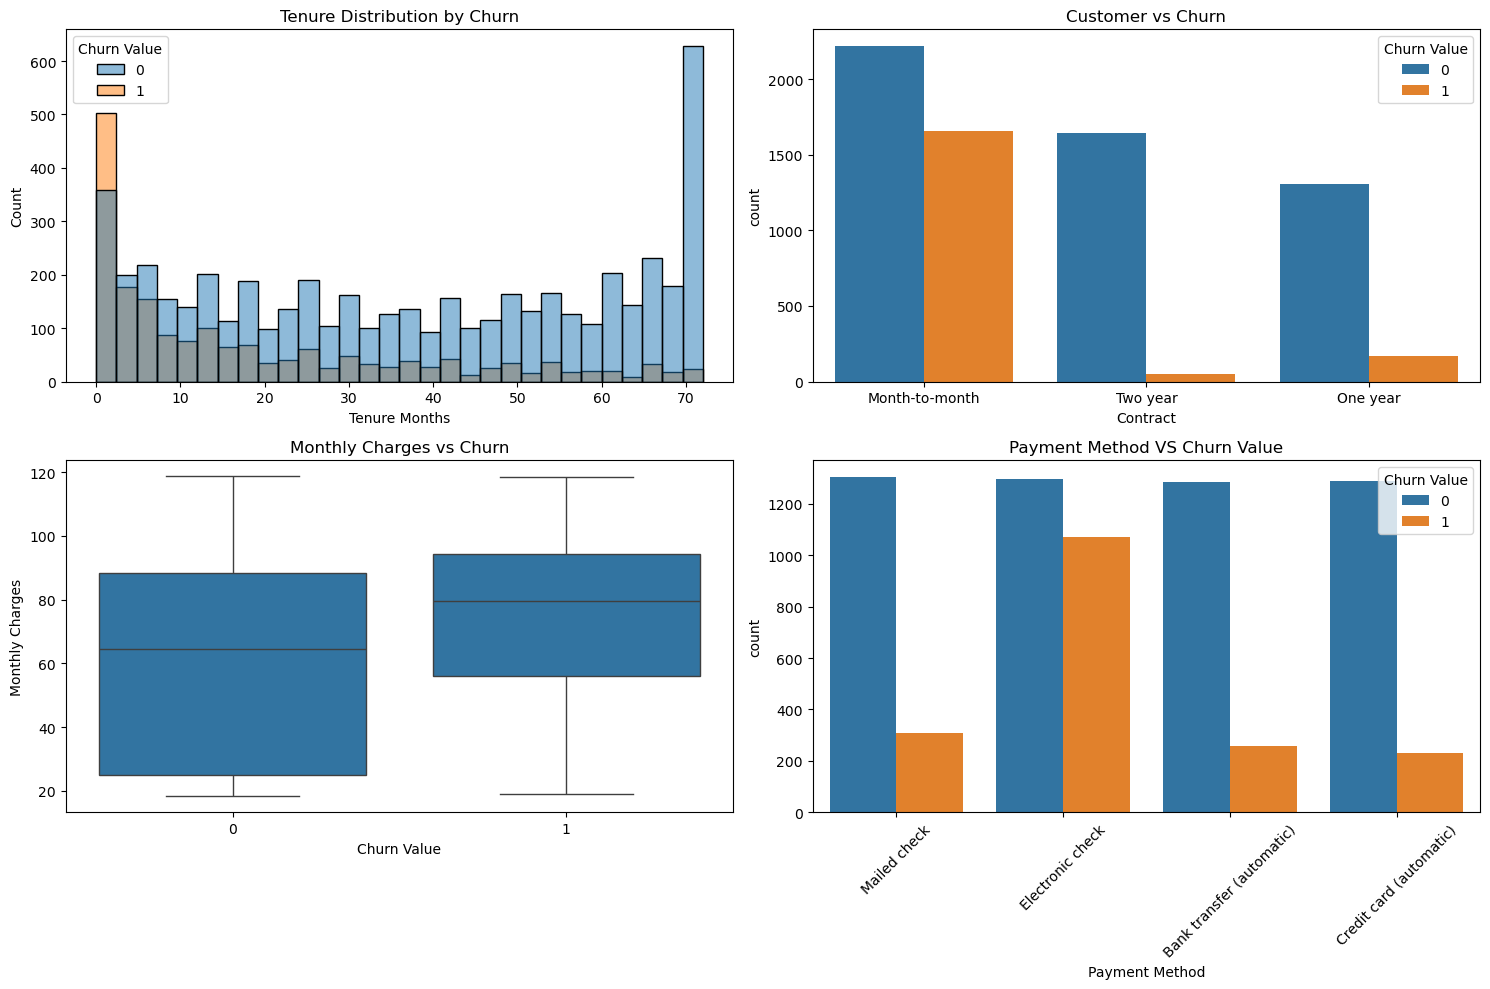

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Value',data=df,palette=['Green','red'])
plt.title('Churn Distribution')
plt.xlabel('Churn Value')
plt.ylabel('No.of Customers')
plt.show()

#Plotting Distributions
#Tenure Vs Churn
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=df, x="Tenure Months", hue="Churn Value", bins=30,ax=ax[0,0])
ax[0,0].set_title("Tenure Distribution by Churn")


#Contract Vs Churn
sns.countplot(x='Contract',hue='Churn Value',data=df,ax=ax[0,1])
ax[0,1].set_title("Customer vs Churn")
plt.xticks(rotation=45)

# Monthly Charges vs Churn
sns.boxplot(x="Churn Value",y="Monthly Charges",data=df,ax=ax[1,0])
ax[1,0].set_title("Monthly Charges vs Churn")

# Payment Method vs Churn
sns.countplot(x="Payment Method",hue="Churn Value",data=df,ax=ax[1,1])
ax[1,1].set_title("Payment Method VS Churn Value")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
#Encode the Categorical Variables
df=pd.get_dummies(df,drop_first=True)

# Splitting Data

In [22]:
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8048261178140526
ROC AUC: 0.8484460978067115
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1035
           1       0.65      0.59      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



C:\Users\home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForest

In [24]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7955997161107168
ROC AUC: 0.8377832028727169
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# XGBOost

In [25]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_xgb))

C:\Users\home\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:52:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8076650106458482
ROC AUC: 0.8489330646619649
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# Compare All Models

In [26]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"{name} -> Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")

Logistic Regression -> Accuracy: 0.8048, ROC-AUC: 0.8484
Random Forest -> Accuracy: 0.7956, ROC-AUC: 0.8378
XGBoost -> Accuracy: 0.8077, ROC-AUC: 0.8489


# Top 5 Important Features (Using XGBoost)

In [162]:
importances = pd.Series(xgb.feature_importances_, index=X.columns)
top5 = importances.sort_values(ascending=False).head(5)

print("Top 5 Important Features:")
print(top5)

Top 5 Important Features:
Internet Service_Fiber optic    0.333852
Contract_Two year               0.168077
Contract_One year               0.104822
Internet Service_No             0.077315
Dependents_Yes                  0.059049
dtype: float32
